# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/reviews.csv", index_col="Id")

# Exploratory Data Analysis

In [3]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Shape

In [7]:
df.shape

(568454, 9)

In [4]:
df.describe(include="all")

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
count,568454,568454,568428,568454.000000,568454.00000,568454.000000,5.684540e+05,568427,568454
unique,74258,256059,218415,NaN,NaN,NaN,NaN,295742,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",NaN,NaN,NaN,NaN,Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,NaN,NaN,NaN,NaN,2462,199
mean,NaN,NaN,NaN,1.743817,2.22881,4.183199,1.296257e+09,NaN,NaN
std,NaN,NaN,NaN,7.636513,8.28974,1.310436,4.804331e+07,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.00000,1.000000,9.393408e+08,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.00000,4.000000,1.271290e+09,NaN,NaN
50%,NaN,NaN,NaN,0.000000,1.00000,5.000000,1.311120e+09,NaN,NaN
75%,NaN,NaN,NaN,2.000000,2.00000,5.000000,1.332720e+09,NaN,NaN


There are 568 454 reviews, 74 258 unique products reviewed by 256 059 users.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568428 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


We have 4 discrete numerical columns : Helpfulness Numerator, Helpfulness Denominator, Score and Time. 
We have 3 categorical ciolumns : ProductId, UserId and ProfileName.

## Data formats

We can transform the Time column into a Date column

In [9]:
df.Time = df.Time.apply(lambda x: pd.to_datetime(x, unit='s'))

In [10]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


## Missing Values

In [11]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

We notice Profile Name and Summary columns have some missing values. 

### Profile Name Imputation
if userId has duplicated values and one of the rows has a profile name, we can use this value. If the userId isn't duplicated, we can put the value Anonymous.

In [12]:
df[df.ProfileName.isna()]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
10617,B002DHN956,A1LSYR30XW7CFT,NaN,1,2,5,2010-12-07,Awesome,This is 72 for the price of like 24 at the gro...
25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,2011-08-29,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,2010-07-06,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
47924,B004SRH2B6,A2DEHJJIEAPPBF,NaN,0,0,5,2012-06-06,Great taste,Enjoy drinking this brand. Tastes as good as ...
49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,2010-08-24,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,2011-08-30,Wheatgrass,Kitty seems to like this sprinkled on her food...
106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,2012-01-17,Finally!,"You cannot find this in the stores anymore, it..."
121820,B006N3I2SK,A34F9B57SYQ5XR,NaN,0,0,5,2012-04-25,Exactly what I ordered,"Very good coffee, very good price. It can be ..."
125453,B001EO6ESS,A34F9B57SYQ5XR,NaN,0,0,5,2012-04-25,Exactly what I ordered,"Very good coffee, very good price. It can be ..."


In [13]:
userIdsWithoutProfileName = df[df.ProfileName.isna()].UserId
userIdsWithoutProfileName # 26 user Ids

Id
10617     A1LSYR30XW7CFT
25510     A36BVYD0NT7Z0F
38875     A36BVYD0NT7Z0F
47924     A2DEHJJIEAPPBF
49801     A2LYFY32LXQDON
67078     A2P0P67Y55SNOX
106551    A1P500QXEG3IUZ
121820    A34F9B57SYQ5XR
125453    A34F9B57SYQ5XR
137614     AGT3BYX5P9SLH
163192     AGT3BYX5P9SLH
172463     AC9U70TRGPDGJ
211847    A2DEHJJIEAPPBF
268649    A2DEHJJIEAPPBF
297276    A29D7XVSBCLFLD
306752     AGT3BYX5P9SLH
331648    A1PZJLGDQSLZWE
358675    A2DEHJJIEAPPBF
431599    A36BVYD0NT7Z0F
440826     AC0E8TXIYABB5
461669    A34F9B57SYQ5XR
490413     AGT3BYX5P9SLH
491729    A29D7XVSBCLFLD
515437    A2H7605OSHVIQ5
517677    A1VIUQE908L3M3
560447     AGT3BYX5P9SLH
Name: UserId, dtype: object

In [14]:
userIdsWithoutProfileName = userIdsWithoutProfileName.unique() # 14 unique values
userIdsWithoutProfileName

array(['A1LSYR30XW7CFT', 'A36BVYD0NT7Z0F', 'A2DEHJJIEAPPBF',
       'A2LYFY32LXQDON', 'A2P0P67Y55SNOX', 'A1P500QXEG3IUZ',
       'A34F9B57SYQ5XR', 'AGT3BYX5P9SLH', 'AC9U70TRGPDGJ',
       'A29D7XVSBCLFLD', 'A1PZJLGDQSLZWE', 'AC0E8TXIYABB5',
       'A2H7605OSHVIQ5', 'A1VIUQE908L3M3'], dtype=object)

In [15]:
def getExistingProfileName(data, userId):
    newProfileName = "Anonymous"
    profileNames = df[df.UserId == userId].ProfileName.dropna()
    hasProfileName = len(df[df.UserId == userId].ProfileName.dropna())

    if len(profileNames):
        newProfileName = profielNames[0]

    return newProfileName

In [16]:
for userId in userIdsWithoutProfileName: 
    df.loc[df.UserId == userId, "ProfileName"]= getExistingProfileName(df, userId)

### Summary Imputation
Since we don't know what the user could have put as a summary, we can put some neutral placeholder, that the front-end team on Amazon website could have put such as "Review Summary".

In [17]:
df.loc[df.Summary.isna(), "Summary"] = "Review Summary"

## Duplicated values

In [18]:
df.duplicated().sum()

281

We can remove duplicated values

In [19]:
df.drop_duplicates(inplace=True)

### How many reviews do we have per customer ?

In [24]:
df.groupby("UserId").Text.count().mean()

2.21891439082399

## Distribution Type

<Axes: >

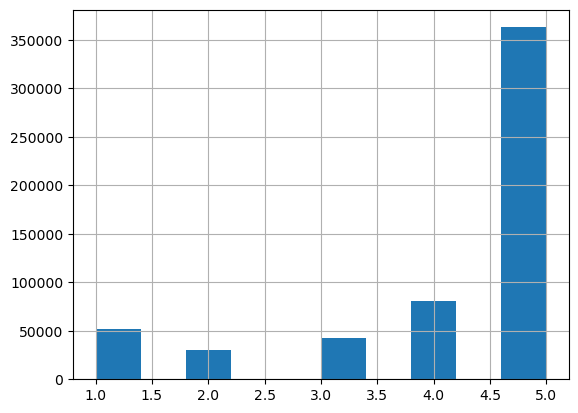

In [66]:
df.Score.hist()

In [71]:
df.Score.value_counts() / len(df) * 100

Score
5    63.877727
4    14.190572
1     9.192799
3     7.500180
2     5.238721
Name: count, dtype: float64

<Axes: >

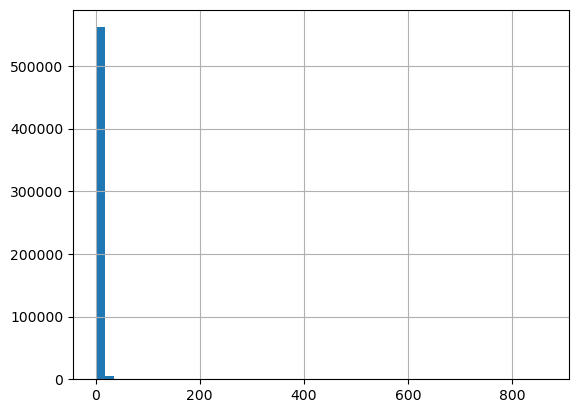

In [29]:
df.HelpfulnessNumerator.hist(bins=50)

<Axes: >

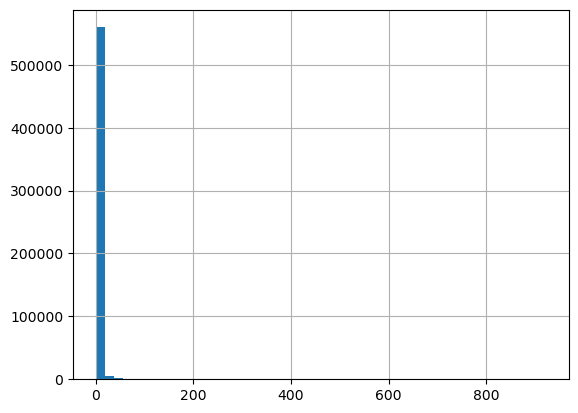

In [30]:
df.HelpfulnessDenominator.hist(bins=50)

63% of the Score ratings are equal to 5, so we may notice a class imbalance especially if we have to do sentiment analysis. The dataset may have a higher proportion of positive reviews.

## Outliers detection

Let's have a look at our numerical columns to see if there aren't outstanding values

### Helpfulness Numerator
Number of users who found the review helpful

In [62]:
df.HelpfulnessNumerator.unique() # values look OK

array([  1,   0,   3,   4,   2,  19,  13,   9,  15,   5,  17,   8,   6,
         7,  43,  14,  11,  20,  27,  12,  10,  16,  21,  26,  23, 165,
        45,  30, 100,  32,  24,  22,  18,  59, 187,  29, 112, 107,  51,
        36,  25,  88,  35,  38,  42,  70,  86,  48,  34,  96,  53,  40,
        31,  65, 128,  97,  82,  37,  28, 202,  47, 149,  80,  77,  69,
        56,  39, 111,  60,  66,  44,  91, 115,  93, 180, 129,  58,  83,
        55,  62,  89,  50,  33, 135,  71, 157,  73, 122,  90,  81, 203,
       168,  64,  61, 398, 206, 133,  41,  84,  63,  95,  68, 110,  57,
        72,  52,  54,  49, 177,  46, 137, 286,  87, 264,  85, 258,  75,
       119, 123, 131, 125, 200, 536, 301,  78, 559, 472, 232, 294,  79,
        67, 154, 105,  74, 117, 113, 141, 162, 349, 130, 230, 189, 454,
       172, 116, 179, 138, 166, 142, 170, 247, 366, 106, 219,  94,  76,
        92, 413, 139, 866, 524, 233, 104, 844,  99, 144, 124, 491, 355,
       121, 192, 580, 102, 155, 436, 446, 262, 319, 103, 356, 43

### Helpfulness Denominator
Number of users who indicated whether they found the review helpful or not

In [63]:
df.HelpfulnessDenominator.unique() # values look OK

array([  1,   0,   3,   4,   2,   5,  19,  13,   9,   7,  15,   8,   6,
        10,  47,  17,  14,  27,  12,  11,  21,  31,  18,  23, 168,  46,
        30, 133,  16,  36,  25,  26,  24,  22,  29,  20,  64, 216,  33,
       112, 108,  51,  37,  39,  89,  35,  43,  42,  74,  49,  34,  28,
        53,  96,  58,  41,  65, 130, 100,  84,  38,  40,  32,  48, 219,
       155,  83,  85,  72,  56,  63, 128,  79,  76,  55,  68,  66,  44,
        94,  59, 117, 188, 134,  92,  57,  71,  98,  90,  45, 135, 170,
        77,  52, 123,  50,  93,  88, 122, 212, 192, 120, 401, 209,  95,
        86,  99,  73,  60, 124,  54,  61,  70, 180,  91,  81, 138, 163,
       307, 270, 151,  78,  62, 119, 139, 137, 215, 539, 305, 562, 477,
       235,  87,  69, 298,  75,  82, 103, 156, 110, 144,  80,  67, 127,
       162, 181, 356, 245, 462, 174, 111, 182, 143, 179, 159, 101, 171,
        97, 249, 384, 187, 121, 263, 131, 165, 416, 106, 878, 536, 238,
       109, 923, 115, 150, 371, 105, 154, 125, 149, 569, 360, 22

By doing HelpfulNess Numerator / Helpfull Denominator, we get the percetage of customers finding the reviews helpful. Which also gives us the percentage of the customers not finding thos reviews helpful. It can be good to create another column called "Percentage of customers finding the reviews helpful)

### Score
Rating between 1 and 5

In [64]:
df.Score.unique() # OK

array([5, 1, 4, 2, 3], dtype=int64)

We don't have continuous numerical values. Nothing to do about outliers detection.

In [32]:
# export dataframe
df.to_csv("../data/reviews_preprocessed.csv")